/tmp/ipython-input-1984189253.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0282 - val_loss: 7.8572e-04
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.5298e-04 - val_loss: 0.0011
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9805e-04 - val_loss: 7.0480e-04
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5146e-04 - val_loss: 7.3761e-04
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3518e-04 - val_loss: 6.3175e-04
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.4245e-04 - val_loss: 6.2331e-04
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.4949e-04 - val_loss: 6.2642e-04
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.4145e-04 - val_loss: 6.9735e-04
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4817e-04 - val_loss: 7.4092e-04
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2612e-04 - val_loss: 6.3121e-04
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.5200e-04 - val_loss: 6.470

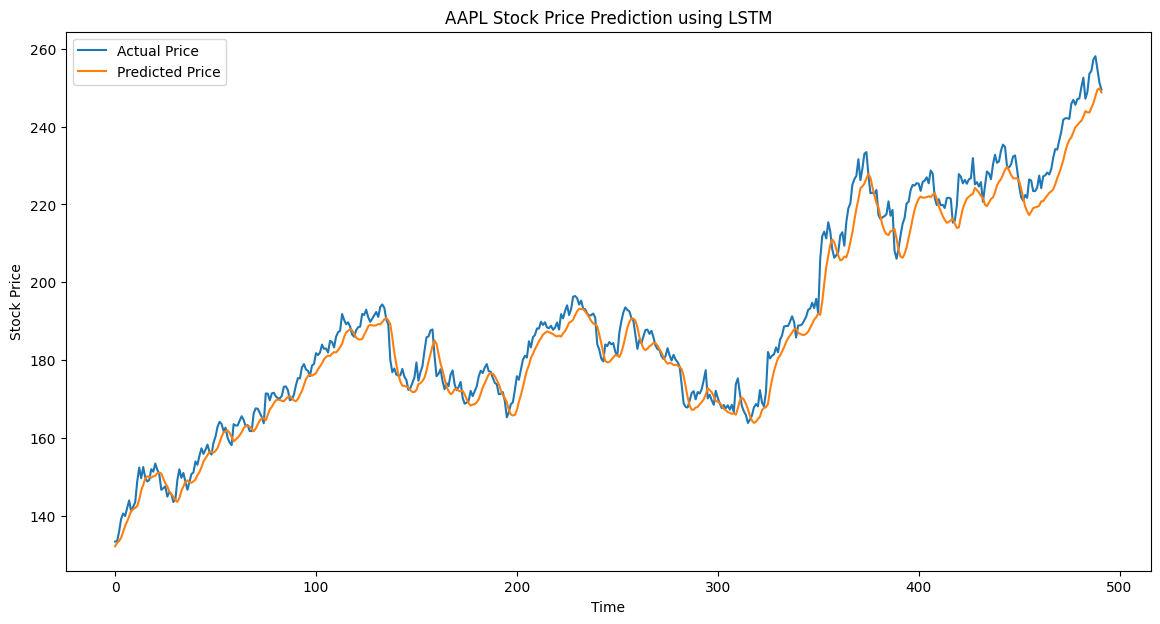

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 1. Load Stock Data
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
close_prices = data['Close'].values.reshape(-1, 1)

# 2. Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# 3. Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Using past 60 days to predict next day
X, y = create_sequences(scaled_data, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 4. Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(seq_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# 6. Predict on test data
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Calculate error
mse = mean_squared_error(actual, predicted)
print(f'Mean Squared Error: {mse}')

# 8. Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
